In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

from google.colab import files


uploaded = files.upload()

Saving Train-22.csv to Train-22.csv


# Functions


In [ ]:
#finds distance between two datapoints over all the features x1=train,x2=test
def distance(x1,x2,index1,index2):
  c=x1.shape[1]
  ans=0
  for i in range (0,c):
    ans=ans+(x1[index1][i]-x2[index2][i])**2
  return (ans)**0.5

In [ ]:
#predicts what class the specific data point belongs to using knn x1=train,x2=test
def predictor(x1,x2,y1,index,k):
  n=len(x1)
  dist=[]

  if x1.all()==x2.all():
    for i in range (0,n):
      if i!=index:
        dist.append((distance(x1,x2,i,index),i))
  else:
    for i in range (0,n):
      dist.append((distance(x1,x2,i,index),i))

  dist.sort()
  a=np.zeros(5)
  for i in range (0,k):
    a[int(y1[dist[i][1]])]+=1
  max_ind=0
  val=0
  for i in range (0,5):
    if val<a[i]:
      val=a[i]
      max_ind=i
  return max_ind

In [ ]:
#Now a function to predict accuracy of the model
def accuracy(x1,x2,y1,y2,k):
  n=len(x2)
  mat=np.zeros((2,2))
  a=0
  for i in range (0,n):
    b=predictor(x1,x2,y1,i,k)
    mat[predictor(x1,x2,y1,i,k)][int(y2[i])] += 1
    if b==int(y2[i]):
      a+=1
  print("The confusion matrix is: ")
  print(mat)
  return a/n

In [ ]:
#Now a function to predict accuracy of the model
def accuracy1(x1,x2,y1,y2,k):
  n=len(x2)
  mat=np.zeros((5,5))
  a=0
  for i in range (0,n):
    b=predictor(x1,x2,y1,i,k)
    mat[predictor(x1,x2,y1,i,k)][int(y2[i])] += 1
    if b==int(y2[i]):
      a+=1
  print("The confusion matrix is: ")
  print(mat)
  return a/n

In [ ]:
# x is x_train, y is y_train
def decision_plot(x,y,df,k,title):
  min1=df["input1"].min()-1
  max1=df["input1"].max()+1
  min2=df["input2"].min()-1
  max2=df["input2"].max()+1
  color_list=["palevioletred","mediumturquoise","tomato","springgreen","sandybrown",]
  resolution=0.1
  x1grid=np.arange(min1,max1,resolution)
  x2grid=np.arange(min2,max2,resolution)
  yhat=[]

  xx1,xx2=np.meshgrid(x1grid,x2grid)

  x2=[]
  for r in range(len(x2grid)):
    for c in range(len(x1grid)):
      x2.append([xx1[r][c],xx2[r][c]])
  x2=np.array(x2)
  for i in range(len(x1grid)*len(x2grid)):
    yhat.append(predictor(x,x2,y,i,k))
  yhat=np.array(yhat)
  zz=yhat.reshape(xx1.shape)

  plt.figure()
  plt.contourf(xx1,xx2,zz,1, colors=color_list[:2],alpha=0.1)
  X1 = df[df.output==0]
  X2 = df[df.output==1]
  X1 = np.array(X1.iloc[:,:])
  X2 = np.array(X2.iloc[:,:])
  plt.scatter(X1[:,1],X1[:,2],c='red')
  plt.scatter(X2[:,1],X2[:,2],c='blue')
  plt.xlabel("Input 1")
  plt.ylabel("Input 2")
  plt.title(title)
  plt.show()

# Knns

## 1-a

In [ ]:
df=pd.read_csv('Train-22.csv')

In [ ]:
x_train=np.array(df.iloc[:,1:3])
y_train=np.array(df.iloc[:,3:4])

In [ ]:
df=pd.read_csv('Test-22.csv')

In [ ]:
x_test=np.array(df.iloc[:,1:3])
y_test=np.array(df.iloc[:,3:4])

In [ ]:
df=pd.read_csv('Val-22.csv')

In [ ]:
x_val=np.array(df.iloc[:,1:3])
y_val=np.array(df.iloc[:,3:4])

### K=1

In [ ]:
print("Accuracy is ",accuracy(x_train,x_train,y_train,y_train,1))

The confusion matrix is: 
[[181.   0.]
 [  1. 178.]]
Accuracy is  0.9972222222222222


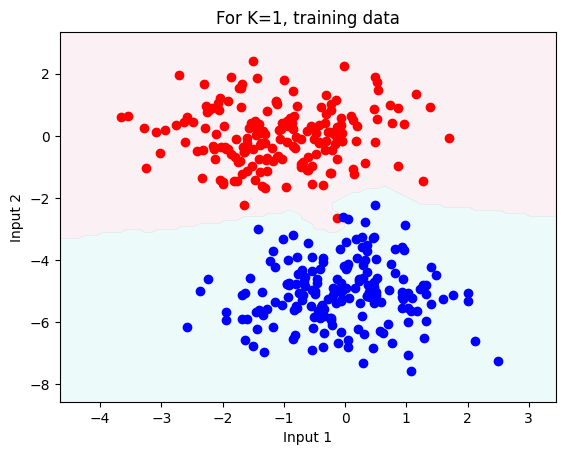

In [ ]:
df=pd.read_csv('Train-22.csv')
decision_plot(x_train,y_train,df,1,"For K=1, training data")

In [ ]:
print("Accuracy is ",accuracy(x_train,x_val,y_train,y_val,1))

The confusion matrix is: 
[[45.  0.]
 [ 2. 43.]]
Accuracy is  0.9777777777777777


In [ ]:
print("Accuracy is ",accuracy(x_train,x_test,y_train,y_test,1))

The confusion matrix is: 
[[21.  0.]
 [ 0. 29.]]
Accuracy is  1.0


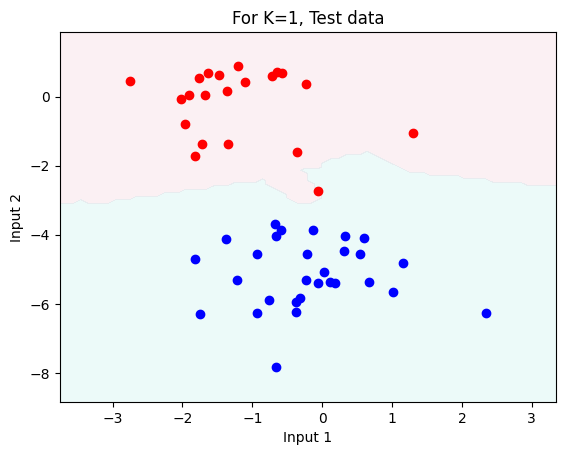

In [ ]:
df=pd.read_csv('Test-22.csv')
decision_plot(x_train,y_train,df,1,"For K=1, Test data")

### K=7

In [ ]:
print("Accuracy is ",accuracy(x_train,x_train,y_train,y_train,7))

The confusion matrix is: 
[[181.   0.]
 [  1. 178.]]
Accuracy is  0.9972222222222222


In [ ]:
print("Accuracy is ",accuracy(x_train,x_val,y_train,y_val,7))

The confusion matrix is: 
[[45.  0.]
 [ 2. 43.]]
Accuracy is  0.9777777777777777


In [ ]:
print("Accuracy is ",accuracy(x_train,x_test,y_train,y_test,7))

The confusion matrix is: 
[[20.  0.]
 [ 1. 29.]]
Accuracy is  0.98


### K=15

In [ ]:
print("Accuracy is ",accuracy(x_train,x_train,y_train,y_train,15))

The confusion matrix is: 
[[181.   0.]
 [  1. 178.]]
Accuracy is  0.9972222222222222


In [ ]:
print("Accuracy is ",accuracy(x_train,x_val,y_train,y_val,15))

The confusion matrix is: 
[[46.  0.]
 [ 1. 43.]]
Accuracy is  0.9888888888888889


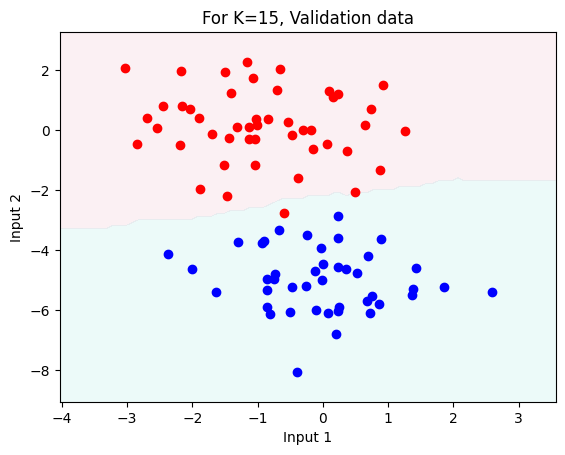

In [ ]:
df=pd.read_csv('Val-22.csv')
decision_plot(x_train,y_train,df,15,"For K=15, Validation data")

In [ ]:
print("Accuracy is ",accuracy(x_train,x_test,y_train,y_test,15))

The confusion matrix is: 
[[20.  0.]
 [ 1. 29.]]
Accuracy is  0.98


## 1(b)

In [ ]:
df=pd.read_csv('Train-1.csv')

In [ ]:
x_train=np.array(df.iloc[:,1:3])
y_train=np.array(df.iloc[:,3:4])

In [ ]:
df=pd.read_csv('Val-1.csv')

In [ ]:
x_val=np.array(df.iloc[:,1:3])
y_val=np.array(df.iloc[:,3:4])

In [ ]:
df=pd.read_csv('Test-1.csv')

In [ ]:
x_test=np.array(df.iloc[:,1:3])
y_test=np.array(df.iloc[:,3:4])

In [ ]:
# x is x_train, y is y_train
def decision_plot(x,y,df,k,title):
  min1=df["x1"].min()-1
  max1=df["x1"].max()+1
  min2=df["x2"].min()-1
  max2=df["x2"].max()+1
  color_list=["palevioletred","mediumturquoise","tomato","springgreen","sandybrown",]
  resolution=0.1
  x1grid=np.arange(min1,max1,resolution)
  x2grid=np.arange(min2,max2,resolution)
  yhat=[]

  xx1,xx2=np.meshgrid(x1grid,x2grid)

  x2=[]
  for r in range(len(x2grid)):
    for c in range(len(x1grid)):
      x2.append([xx1[r][c],xx2[r][c]])
  x2=np.array(x2)
  for i in range(len(x1grid)*len(x2grid)):
    yhat.append(predictor(x,x2,y,i,k))
  yhat=np.array(yhat)
  zz=yhat.reshape(xx1.shape)

  plt.figure()
  plt.contourf(xx1,xx2,zz,1, colors=color_list[:2],alpha=0.1)
  X1 = df[df.label==0]
  X2 = df[df.label==1]
  X1 = np.array(X1.iloc[:,:])
  X2 = np.array(X2.iloc[:,:])
  plt.scatter(X1[:,1],X1[:,2],c='red')
  plt.scatter(X2[:,1],X2[:,2],c='blue')
  plt.xlabel("Input 1")
  plt.ylabel("Input 2")
  plt.title(title)
  plt.show()

### K=1

In [ ]:
print("Accuracy is ",accuracy(x_train,x_train,y_train,y_train,1))

The confusion matrix is: 
[[274.   0.]
 [  0. 288.]]
Accuracy is  1.0


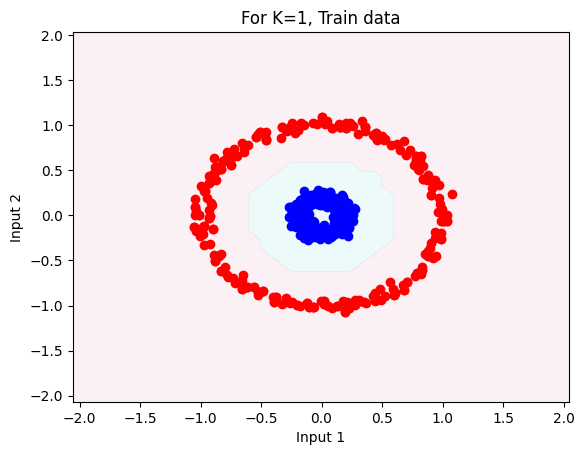

In [ ]:
df=pd.read_csv('Train-1.csv')
decision_plot(x_train,y_train,df,1,"For K=1, Train data")

In [ ]:
print("Accuracy is ",accuracy(x_train,x_val,y_train,y_val,1))

The confusion matrix is: 
[[82.  0.]
 [ 0. 77.]]
Accuracy is  1.0


In [ ]:
print("Accuracy is ",accuracy(x_train,x_test,y_train,y_test,1))

The confusion matrix is: 
[[45.  0.]
 [ 0. 36.]]
Accuracy is  1.0


### K=7

In [ ]:
print("Accuracy is ",accuracy(x_train,x_train,y_train,y_train,7))

The confusion matrix is: 
[[274.   0.]
 [  0. 288.]]
Accuracy is  1.0


In [ ]:
print("Accuracy is ",accuracy(x_train,x_val,y_train,y_val,7))

The confusion matrix is: 
[[82.  0.]
 [ 0. 77.]]
Accuracy is  1.0


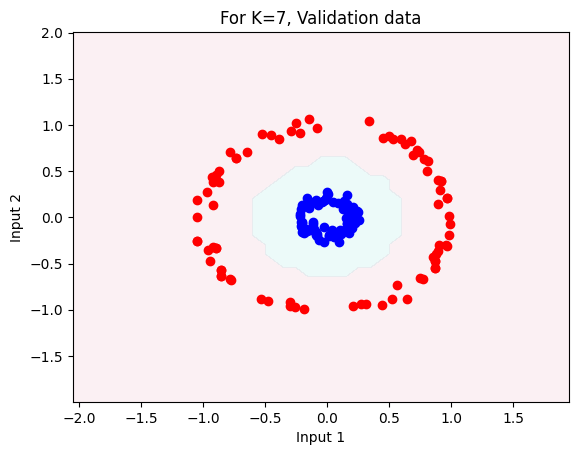

In [ ]:
df=pd.read_csv('Val-1.csv')
decision_plot(x_train,y_train,df,7,"For K=7, Validation data")

In [ ]:
print("Accuracy is ",accuracy(x_train,x_test,y_train,y_test,7))

The confusion matrix is: 
[[45.  0.]
 [ 0. 36.]]
Accuracy is  1.0


### K=15

In [ ]:
print("Accuracy is ",accuracy(x_train,x_train,y_train,y_train,15))

The confusion matrix is: 
[[274.   0.]
 [  0. 288.]]
Accuracy is  1.0


In [ ]:
print("Accuracy is ",accuracy(x_train,x_val,y_train,y_val,15))

The confusion matrix is: 
[[82.  0.]
 [ 0. 77.]]
Accuracy is  1.0


In [ ]:
print("Accuracy is ",accuracy(x_train,x_test,y_train,y_test,15))

The confusion matrix is: 
[[45.  0.]
 [ 0. 36.]]
Accuracy is  1.0


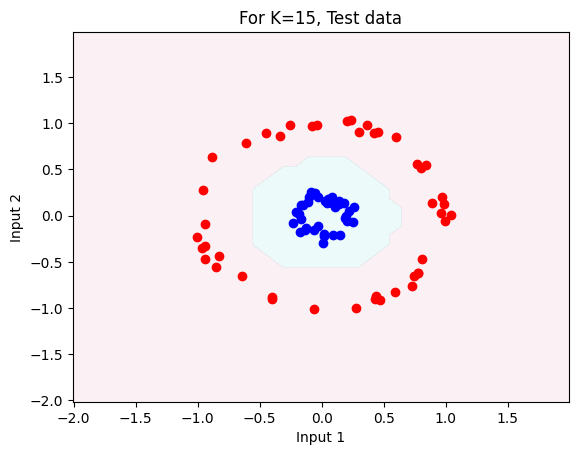

In [ ]:
df=pd.read_csv('Test-1.csv')
decision_plot(x_train,y_train,df,15,"For K=15, Test data")

## 2

In [ ]:
df=pd.read_csv('train_data.csv')

In [ ]:
x_train=np.array(df.iloc[:,:])

In [ ]:
df=pd.read_csv('train_label.csv')

In [ ]:
y_train=np.array(df.iloc[:,:])

In [ ]:
df=pd.read_csv('test_data.csv')

In [ ]:
x_test=np.array(df.iloc[:,:])

In [ ]:
df=pd.read_csv('test_label.csv')

In [ ]:
y_test=np.array(df.iloc[:,:])

In [ ]:
df=pd.read_csv('val_data.csv')

In [ ]:
x_val=np.array(df.iloc[:,:])

In [ ]:
df=pd.read_csv('val_label.csv')

In [ ]:
y_val=np.array(df.iloc[:,:])

### K=1

In [ ]:
print("Accuracy is ",accuracy1(x_train,x_train,y_train,y_train,1))

The confusion matrix is: 
[[532.  51.  67.  78.  47.]
 [ 32. 239. 138. 126.  84.]
 [ 34. 103. 166.  60. 132.]
 [ 78. 200. 188. 343. 213.]
 [ 23. 107. 141.  93. 224.]]
Accuracy is  0.42983709631323236


In [ ]:
print("Accuracy is ",accuracy1(x_train,x_test,y_train,y_test,1))

The confusion matrix is: 
[[75.  7. 11. 12.  8.]
 [ 5. 35. 16. 13. 14.]
 [ 5. 14. 24. 13. 13.]
 [11. 36. 35. 52. 32.]
 [ 3.  8. 14. 10. 33.]]
Accuracy is  0.43887775551102204


In [ ]:
print("Accuracy is ",accuracy1(x_train,x_val,y_train,y_val,1))

The confusion matrix is: 
[[152.  15.  18.  23.  14.]
 [  5.  67.  39.  29.  22.]
 [ 10.  32.  57.  16.  41.]
 [ 27.  60.  54. 115.  43.]
 [  5.  26.  32.  17.  80.]]
Accuracy is  0.47147147147147145


### K=7

In [ ]:
print("Accuracy is ",accuracy1(x_train,x_train,y_train,y_train,7))

The confusion matrix is: 
[[610.  69.  92.  74.  48.]
 [  9. 273. 119.  96.  96.]
 [ 14.  69. 163.  49. 123.]
 [ 62. 224. 223. 448. 231.]
 [  4.  65. 103.  33. 202.]]
Accuracy is  0.4847099171191769


In [ ]:
print("Accuracy is ",accuracy1(x_train,x_test,y_train,y_test,7))

The confusion matrix is: 
[[87. 12. 14. 13.  9.]
 [ 2. 40. 16.  9.  9.]
 [ 3.  9. 23.  9. 17.]
 [ 6. 32. 33. 62. 37.]
 [ 1.  7. 14.  7. 28.]]
Accuracy is  0.48096192384769537


In [ ]:
print("Accuracy is ",accuracy1(x_train,x_val,y_train,y_val,7))

The confusion matrix is: 
[[171.  21.  23.  23.  17.]
 [  3.  73.  38.  25.  29.]
 [  2.  19.  47.   8.  41.]
 [ 23.  73.  61. 134.  49.]
 [  0.  14.  31.  10.  64.]]
Accuracy is  0.4894894894894895


### K=15

In [ ]:
print("Accuracy is ",accuracy1(x_train,x_train,y_train,y_train,15))

The confusion matrix is: 
[[617.  57.  89.  71.  44.]
 [  2. 245.  92.  54.  64.]
 [  8.  56. 137.  32.  87.]
 [ 65. 273. 266. 512. 267.]
 [  7.  69. 116.  31. 238.]]
Accuracy is  0.4998571020291512


In [ ]:
print("Accuracy is ",accuracy1(x_train,x_test,y_train,y_test,15))

The confusion matrix is: 
[[88.  7. 13. 11.  7.]
 [ 0. 34.  7.  3.  7.]
 [ 1.  9. 15.  7. 15.]
 [ 8. 42. 46. 71. 38.]
 [ 2.  8. 19.  8. 33.]]
Accuracy is  0.48296593186372744


In [ ]:
print("Accuracy is ",accuracy1(x_train,x_val,y_train,y_val,15))

The confusion matrix is: 
[[178.  19.  19.  19.  13.]
 [  2.  64.  22.  15.  19.]
 [  0.  18.  43.   7.  30.]
 [ 18.  84.  84. 153.  61.]
 [  1.  15.  32.   6.  77.]]
Accuracy is  0.5155155155155156


In [ ]:
x1_min,x2_min=np.min(x_train[:, 0])-1,np.min(x_train[:, 1])-1
x1_max,x2_max=np.max(x_train[:, 0])+1,np.max(x_train[:, 1])+1
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 36), np.linspace(x2_min, x2_max, 10))
z=[]
n=len(x_train)
for i in range (0,n):
  z.append(predictor(x_train,x_train,y_train,i,1))
z=np.array(z)
z=np.round(z).reshape(xx.shape)
#plt.contour(xx,yy,z,levels=[0.1], colors='r')
plt.scatter(x_train[:, 0],x_train[:, 1],c=z,marker='o',edgecolors='k')
plt.show()

# Naive-Bayes

## Functions

In [ ]:
#function to find cov matrix and mean vector
def cov_mat(x):
  sig11=0
  sig22=0
  sig12=0
  mean1=0
  mean2=0
  n=len(x)
  for i in range (0,n):
    mean1 += x[i][0]
    mean2 += x[i][1]
  mean1=mean1/n
  mean2=mean2/n
  for i in range (0,n):
    sig11 += (x[i][0]-mean1)**2
    sig22 += (x[i][1]-mean2)**2
    #sig12 += ((x[i][0]-mean1)*(x[i][1]-mean2))
  sig11=sig11/n
  sig22=sig22/n
  #sig12=sig12/n
  cov=[[sig11,sig12],[sig12,sig22]]
  mean_vec=[mean1,mean2]
  return cov,mean_vec

In [ ]:
def likelihood(x, mean, cov):
    inv_cov = np.linalg.inv(cov)
    det_cov = np.linalg.det(cov)
    exponent = -0.5 * np.dot(np.dot((x - mean), inv_cov), (x - mean).T)
    return (1.0 / (2 * np.pi * np.sqrt(det_cov))) * np.exp(exponent)

In [ ]:
# x is a 1x2 vector ,mean1 is 1x2 vec for mean of class1
# mean2 is 1x2 vec for mean of class2, prior probabilities p1,p2
# cov1 is the covariance matrix of class 1 similarly cov2
def predict(x,mean1,mean2,mean_vec,p1,p2,cov1,cov2):
  prob1= likelihood(x,mean1,cov1)*p1
  prob2= likelihood(x,mean2,cov2)*p2
  if prob1>prob2:
    return 0
  else:
    return 1

In [ ]:
# x is the test the thing we are testing on
def accu(x,y,mean1,mean2,mean_vec,p1,p2,cov1,cov2):
  n=len(x)
  a=0
  mat=np.zeros((2,2))
  for i in range (0,n):
    b=predict(x[i],mean1,mean2,mean_vec,p1,p2,cov1,cov2)
    mat[predict(x[i],mean1,mean2,mean_vec,p1,p2,cov1,cov2)][int(y[i])] += 1
    if b==int(y[i]):
      a+=1
  print("The confusion matrix is: ")
  print(mat)
  return a/n

In [ ]:
def prior_prob(y):
  a=[0,0]
  for i in range (0,len(y)):
    a[int(y[i])] +=1
  a[0]=a[0]/len(y)
  a[1]=a[1]/len(y)
  return a

In [ ]:
#num is class number 0 or 1
def mean_indi(x,y,num):
  mean=[0,0]
  for i in range (0,len(x)):
    if int(y[i])==num:
      mean += x[i]
  mean[0]=mean[0]/len(x)
  mean[1]=mean[1]/len(x)
  return mean

In [ ]:
df=pd.read_csv('Train-22.csv')

In [ ]:
x_train=np.array(df.iloc[:,1:3])
y_train=np.array(df.iloc[:,3:4])

In [ ]:
df=pd.read_csv('Test-22.csv')

FileNotFoundError: ignored

In [ ]:
x_test=np.array(df.iloc[:,1:3])
y_test=np.array(df.iloc[:,3:4])

In [ ]:
df=pd.read_csv('Val-22.csv')

In [ ]:
x_val=np.array(df.iloc[:,1:3])
y_val=np.array(df.iloc[:,3:4])

In [ ]:
cov,mean_vec=cov_mat(x_train)

In [ ]:
mean1=mean_indi(x_train,y_train,0)
mean2=mean_indi(x_train,y_train,1)

In [ ]:
p1,p2=prior_prob(y_train)

## Same covariance matrix

In [ ]:
# x is x_train, y is y_train
def decision_plot(x,y,df,title,mean1,mean2,mean_vec,p1,p2,cov1,cov2):
  min1=df["input1"].min()-1
  max1=df["input1"].max()+1
  min2=df["input2"].min()-1
  max2=df["input2"].max()+1
  color_list=["palevioletred","mediumturquoise","tomato","springgreen","sandybrown",]
  resolution=0.1
  x1grid=np.arange(min1,max1,resolution)
  x2grid=np.arange(min2,max2,resolution)
  yhat=[]

  xx1,xx2=np.meshgrid(x1grid,x2grid)

  x2=[]
  for r in range(len(x2grid)):
    for c in range(len(x1grid)):
      x2.append([xx1[r][c],xx2[r][c]])
  x2=np.array(x2)
  for i in range(len(x1grid)*len(x2grid)):
    yhat.append(predict(x2[i],mean1,mean2,mean_vec,p1,p2,cov1,cov2))
  yhat=np.array(yhat)
  zz=yhat.reshape(xx1.shape)

  plt.figure()
  plt.contourf(xx1,xx2,zz,1, colors=color_list[:2],alpha=0.1)
  X1 = df[df.output==0]
  X2 = df[df.output==1]
  X1 = np.array(X1.iloc[:,:])
  X2 = np.array(X2.iloc[:,:])
  plt.scatter(X1[:,1],X1[:,2],c='red')
  plt.scatter(X2[:,1],X2[:,2],c='blue')
  plt.xlabel("Input 1")
  plt.ylabel("Input 2")
  plt.title(title)
  plt.show()

In [ ]:
print("For training dataset")
accu(x_train,y_train,mean1,mean2,mean_vec,p1,p2,cov,cov)


For training dataset
The confusion matrix is: 
[[173.   0.]
 [  9. 178.]]


0.975

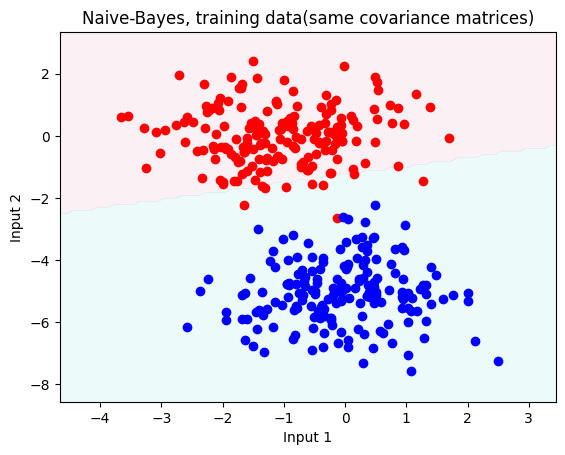

In [ ]:
df=pd.read_csv('Train-22.csv')
decision_plot(x_train,y_train,df,"Naive-Bayes, training data(same covariance matrices)",mean1,mean2,mean_vec,p1,p2,cov,cov)

In [ ]:
print("For test dataset")
accu(x_test,y_test,mean1,mean2,mean_vec,p1,p2,cov,cov)

For test dataset
The confusion matrix is: 
[[18.  0.]
 [ 3. 29.]]


0.94

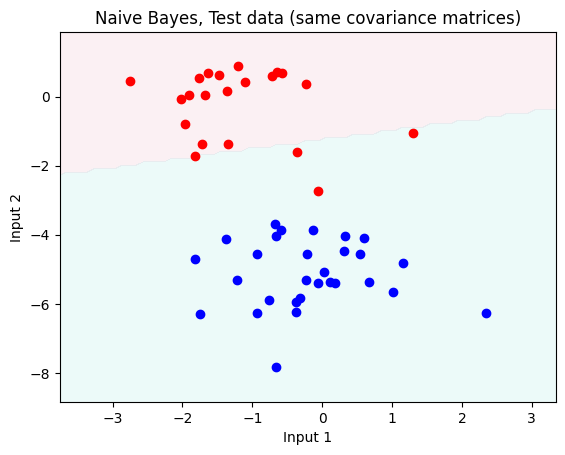

In [ ]:
df=pd.read_csv('Test-22.csv')
decision_plot(x_train,y_train,df,"Naive Bayes, Test data (same covariance matrices)",mean1,mean2,mean_vec,p1,p2,cov,cov)

In [ ]:
print("For val dataset")
accu(x_val,y_val,mean1,mean2,mean_vec,p1,p2,cov,cov)

For val dataset
The confusion matrix is: 
[[41.  0.]
 [ 6. 43.]]


0.9333333333333333

## Different covariance matrices

In [ ]:
df=pd.read_csv('Train-22.csv')

In [ ]:
X1 = df[df.output==0]
X2 = df[df.output==1]

In [ ]:
x1=np.array(X1.iloc[:,1:3])
y1=np.array(X1.iloc[:,3:4])
x2=np.array(X2.iloc[:,1:3])
y2=np.array(X2.iloc[:,3:4])

In [ ]:
cov1,a= cov_mat(x1)
cov2,b= cov_mat(x2)

In [ ]:
print("For training dataset")
accuracy(x_train,y_train,mean1,mean2,mean_vec,p1,p2,cov1,cov2)

For training dataset
The confusion matrix is: 
[[171.   0.]
 [ 11. 178.]]


0.9694444444444444

In [ ]:
print("For test dataset")
accuracy(x_test,y_test,mean1,mean2,mean_vec,p1,p2,cov1,cov2)

For test dataset
The confusion matrix is: 
[[17.  0.]
 [ 4. 29.]]


0.92

In [ ]:
print("For val dataset")
accuracy(x_val,y_val,mean1,mean2,mean_vec,p1,p2,cov1,cov2)

For val dataset
The confusion matrix is: 
[[41.  0.]
 [ 6. 43.]]


0.9333333333333333

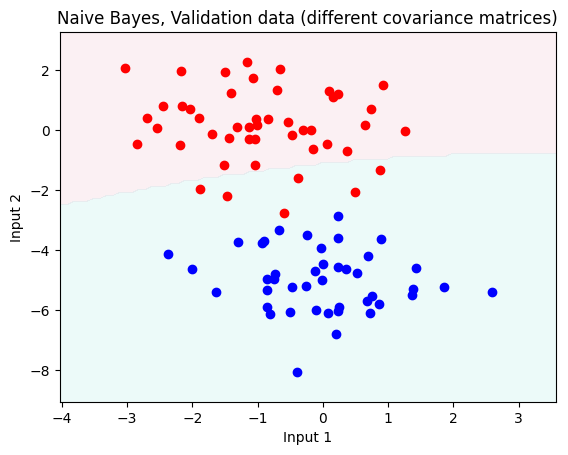

In [ ]:
df=pd.read_csv('Val-22.csv')
decision_plot(x_train,y_train,df,"Naive Bayes, Validation data (different covariance matrices)",mean1,mean2,mean_vec,p1,p2,cov1,cov2)